In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set(rc={'figure.figsize':(10,6)})

In [2]:
 diabetes = pd.read_csv("diabetes.csv")

In [3]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
diabetes.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
diabetes.shape

(768, 9)

In [6]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

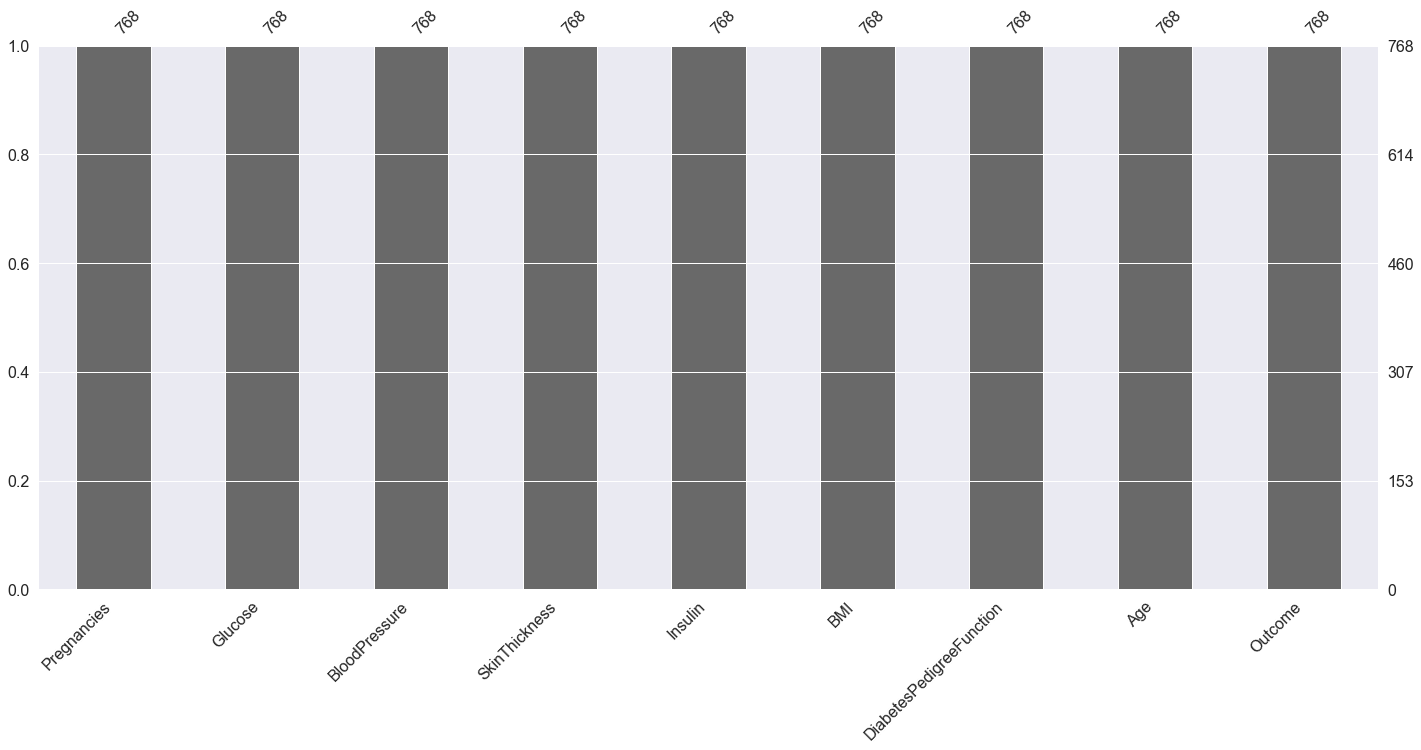

In [9]:
msno.bar(diabetes)

In [10]:
diabetes = diabetes.astype({"Outcome":'category'})

In [11]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [12]:
z_clm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in z_clm:
    diabetes[i] = diabetes[i].replace(0, np.nan)

In [13]:
diabetes.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<AxesSubplot:>

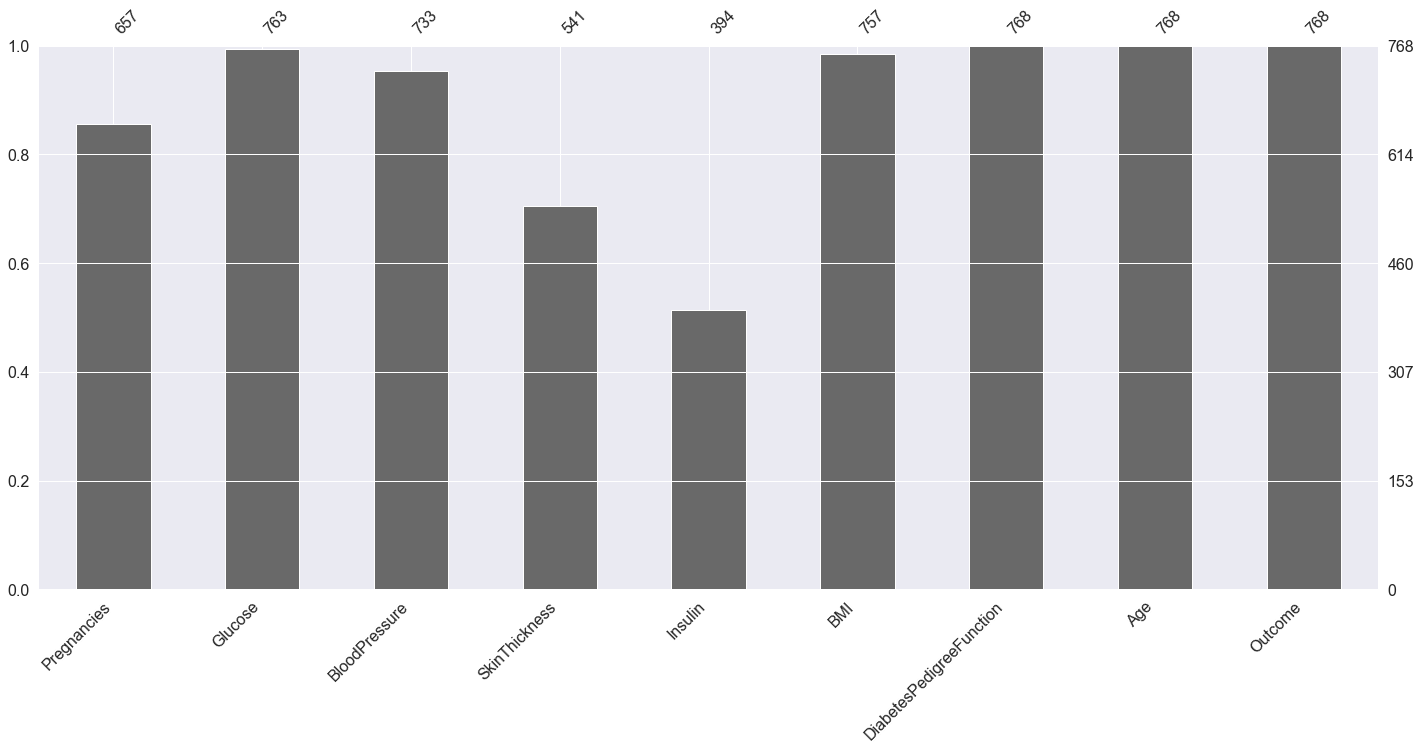

In [14]:
msno.bar(diabetes)

<AxesSubplot:>

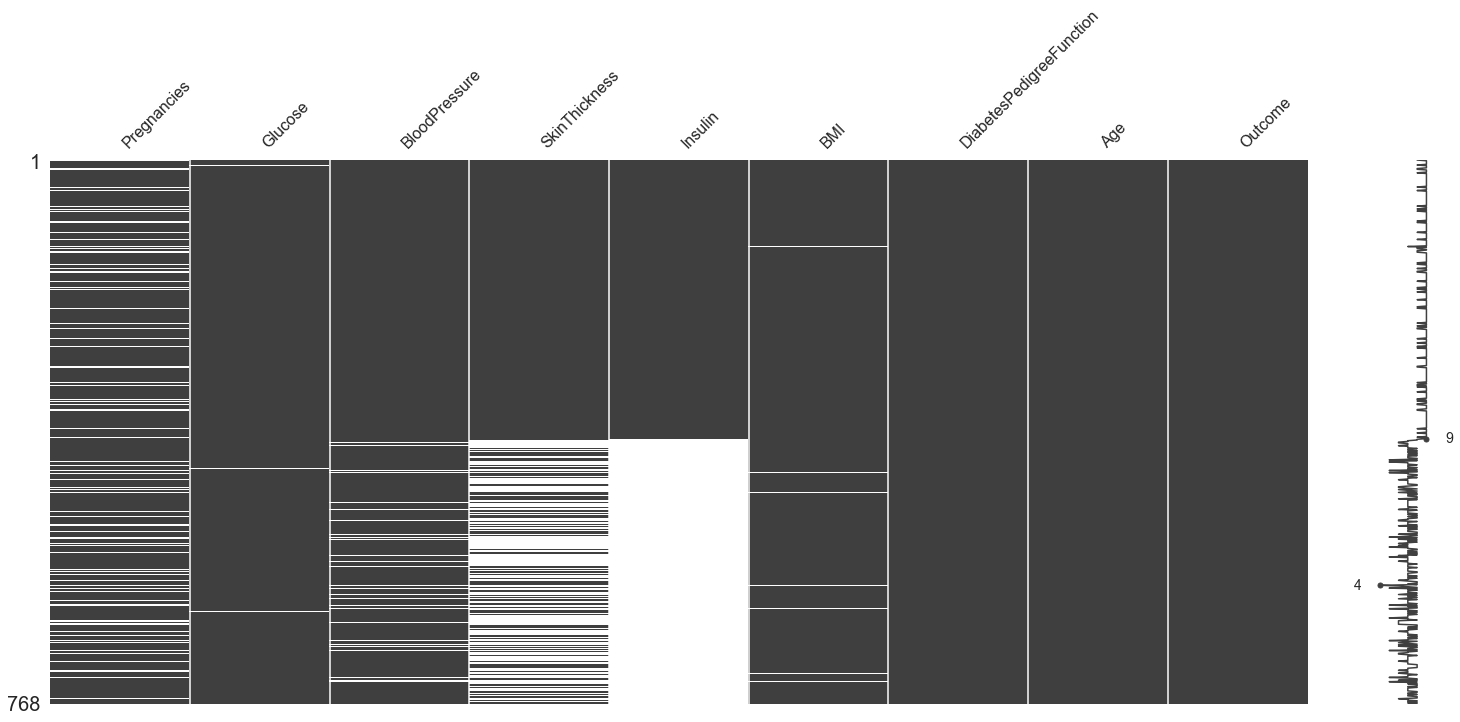

In [15]:
sort = diabetes.sort_values('Insulin')
msno.matrix(sort)

<AxesSubplot:>

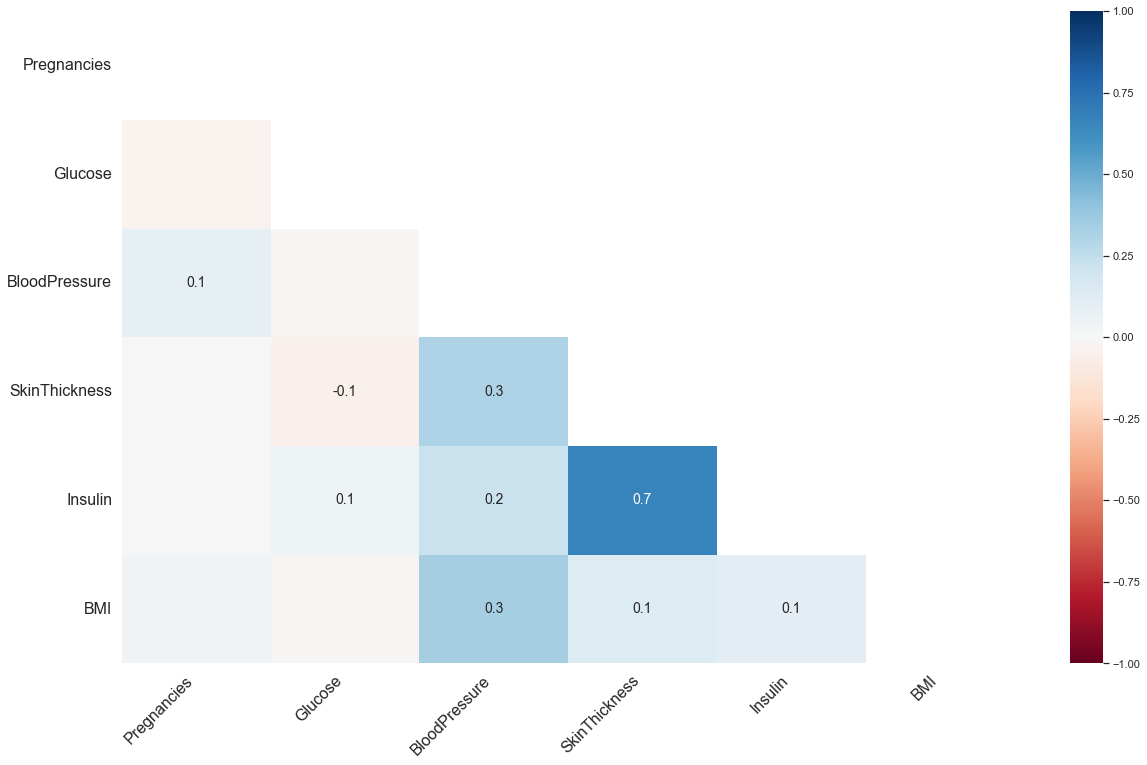

In [16]:
msno.heatmap(diabetes)

In [17]:
diabetes.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,NaN
std,3.217291,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,NaN
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,NaN
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,NaN
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,NaN
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,NaN


In [18]:
from sklearn.impute import SimpleImputer
diabetes_mean = diabetes.copy(deep=True)
mean_imputer = SimpleImputer(strategy= 'mean')
diabetes_mean.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)

In [19]:
diabetes_median = diabetes.copy(deep=True)
median_imputer = SimpleImputer(strategy= 'median')
diabetes_median.iloc[:, :] = median_imputer.fit_transform(diabetes_median)

In [20]:
diabetes_mode = diabetes.copy(deep=True)
mode_imputer = SimpleImputer(strategy= 'most_frequent')
diabetes_mode.iloc[:, :] = mode_imputer.fit_transform(diabetes_mode)

In [21]:
from fancyimpute import KNN
knn_imputer = KNN()
diabetes_knn = diabetes.copy(deep=True)
diabetes_knn.iloc[:, :] = knn_imputer.fit_transform(diabetes_knn)

Imputing row 1/768 with 1 missing, elapsed time: 0.185
Imputing row 101/768 with 2 missing, elapsed time: 0.188
Imputing row 201/768 with 2 missing, elapsed time: 0.190
Imputing row 301/768 with 4 missing, elapsed time: 0.193
Imputing row 401/768 with 2 missing, elapsed time: 0.195
Imputing row 501/768 with 0 missing, elapsed time: 0.198
Imputing row 601/768 with 1 missing, elapsed time: 0.200
Imputing row 701/768 with 0 missing, elapsed time: 0.203


In [22]:
diabetes_knn = diabetes_knn.astype({"Outcome":'category'})

In [23]:
diabetes_knn.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.422967,121.594411,72.356361,29.087737,153.878342,32.447970,0.471876,33.240885
std,3.043790,30.521533,12.216060,9.508800,99.513952,6.892642,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.000000,64.000000,22.681944,88.000000,27.500000,0.243750,24.000000
50%,4.000000,117.000000,72.000000,29.060020,133.376524,32.300000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,35.000000,190.000000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Text(0, 0.5, 'Frequency')

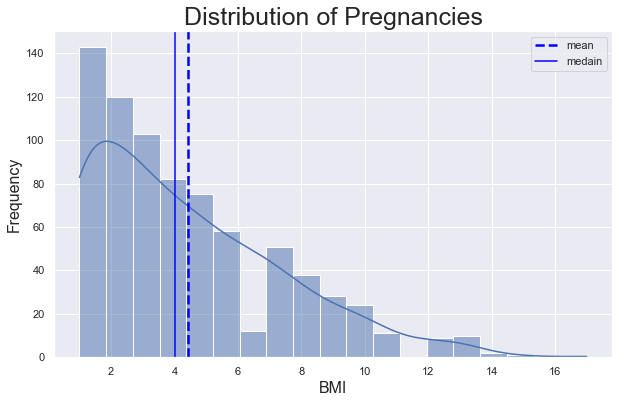

In [24]:
sns.histplot(diabetes_knn['Pregnancies'],kde=True,edgecolor = 'white')
plt.title('Distribution of Pregnancies', fontsize=25)
plt.axvline(x=diabetes_knn['Pregnancies'].mean(),ls='--',lw=2.5, color='blue',label='mean')
plt.axvline(x=diabetes_knn['Pregnancies'].median(), color='blue',label='medain')
plt.legend()
plt.xlabel(i, fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [25]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

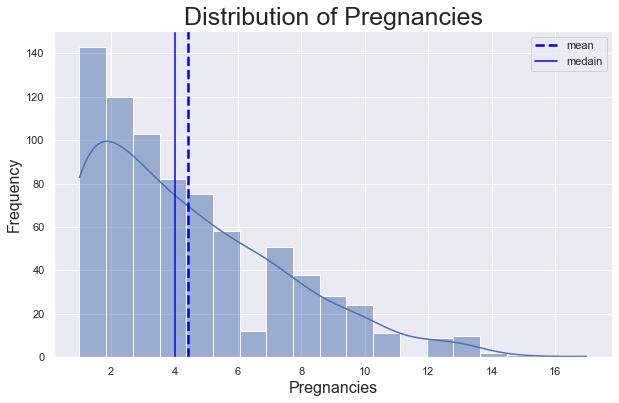

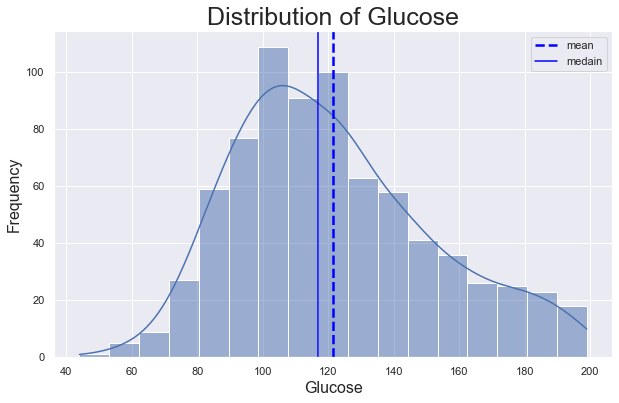

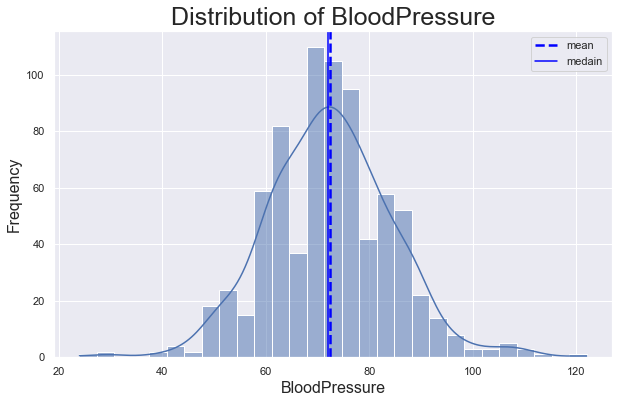

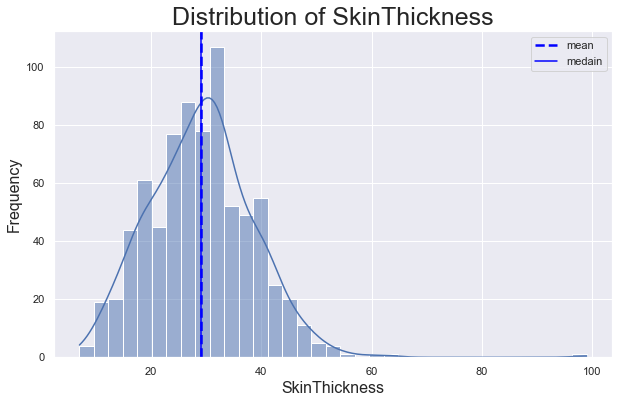

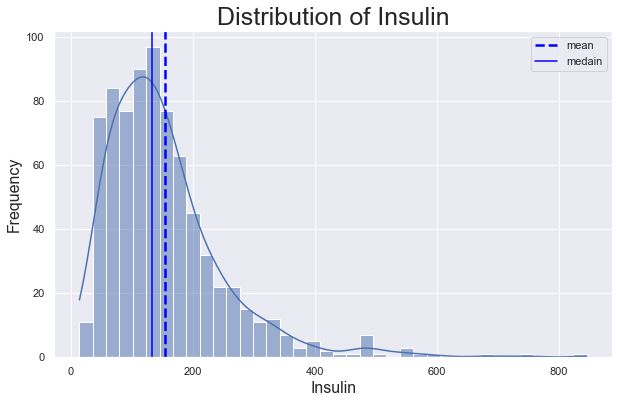

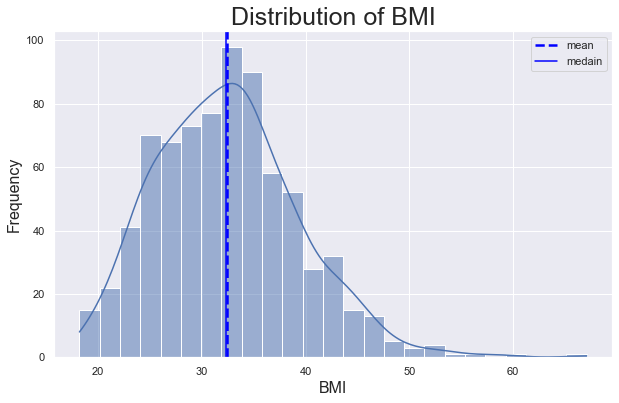

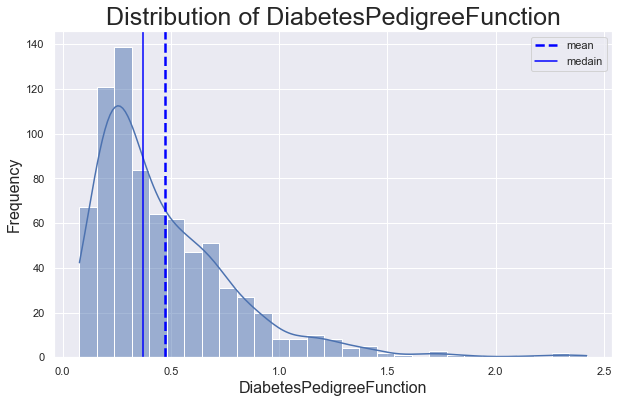

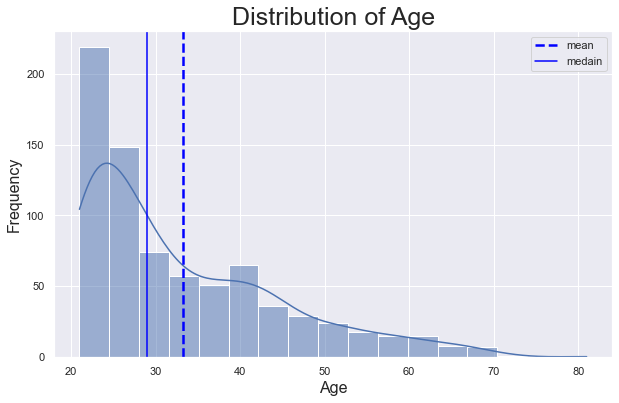

In [26]:
for i in columns:
    fig, ax = plt.subplots(1,1)
    sns.histplot(diabetes_knn[i],kde=True,edgecolor = 'white')
    plt.title('Distribution of %s'%(i), fontsize=25)
    plt.axvline(x=diabetes_knn[i].mean(),ls='--',lw=2.5, color='blue',label='mean')
    plt.axvline(x=diabetes_knn[i].median(), color='blue',label='medain')
    plt.legend()
    plt.xlabel(i, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)

<AxesSubplot:xlabel='Age'>

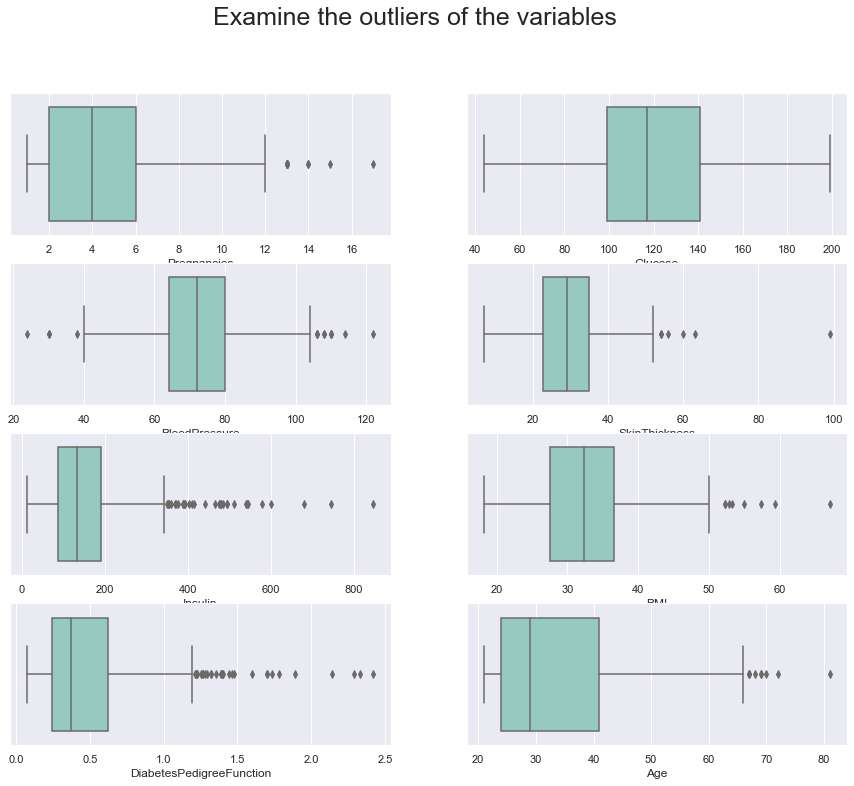

In [28]:
fig, axes = plt.subplots(4, 2, figsize=(15, 12))
  
fig.suptitle('Examine the outliers of the variables', fontsize=25)

sns.boxplot(x = diabetes_knn['Pregnancies'], ax=axes[0, 0], palette='Set3')
sns.boxplot(x = diabetes_knn['Glucose'], ax=axes[0, 1], palette='Set3')
sns.boxplot(x = diabetes_knn['BloodPressure'], ax=axes[1, 0], palette='Set3')
sns.boxplot(x = diabetes_knn['SkinThickness'], ax=axes[1, 1], palette='Set3')
sns.boxplot(x = diabetes_knn['Insulin'], ax=axes[2, 0], palette='Set3')
sns.boxplot(x = diabetes_knn['BMI'], ax=axes[2, 1], palette='Set3')
sns.boxplot(x = diabetes_knn['DiabetesPedigreeFunction'], ax=axes[3, 0], palette='Set3')
sns.boxplot(x = diabetes_knn['Age'], ax=axes[3, 1], palette='Set3')